In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libaries

In [2]:
import pandas as pd
import numpy as np
import json

# Read Reviews Data

* While reading the `yelp_academic_dataset_review.json` file, we could have user `pd.read_json()` in order to load the data into a dataframe. However, this kind of an approach results `MemoryError` due to the restricted `RAM (Random Access Memory)` capacity. In order to overcome this issue, I read `json` file with `buffering` option in `open()` function. This options allows to load a part of the data into RAM but not all at once. Also, I have the ability to write the attributes into a dictionary. Later on, I transformed the dictionary into a dataframe using `pd.DataFrame()`.

In [3]:
# attributes of review.json file
# can be reached at https://www.yelp.com/dataset/documentation/main
columns = ['review_id', 'user_id', 'business_id', 'stars',
           'useful', 'funny', 'cool', 'text', 'date']
df_reviews = {}
for column in columns:
    df_reviews.setdefault(column, [])
with open('/content/drive/My Drive/yelp/yelp_academic_dataset_review.json') as fin:
    for line in fin.readlines():
      data = json.loads(line)
      for k, v in data.items():
        df_reviews[k].append(v)

In [4]:
df_reviews = pd.DataFrame(df_reviews)
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [5]:
# check the size of `df_reviews` in the system
import sys
print('The size of df_reviews is ', end='')
print('{:.2f}'.format(sys.getsizeof(df_reviews) / 1073741824) + " GB")

The size of df_reviews is 7.44 GB


# Read Business Data


In [6]:
df_business = pd.read_json('/content/drive/My Drive/yelp/yelp_academic_dataset_business.json',
                           lines=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [7]:
df_attributes = {}
for d in df_business.attributes.values:
  try:
    for k in d:
      df_attributes.setdefault(k, [])
  except:
    continue

In [8]:
', '.join([k for k in list(df_attributes.keys())])

'BusinessAcceptsCreditCards, BikeParking, GoodForKids, BusinessParking, ByAppointmentOnly, RestaurantsPriceRange2, DogsAllowed, WiFi, RestaurantsAttire, RestaurantsTakeOut, NoiseLevel, RestaurantsReservations, RestaurantsGoodForGroups, HasTV, Alcohol, RestaurantsDelivery, OutdoorSeating, Caters, WheelchairAccessible, AcceptsInsurance, RestaurantsTableService, Ambience, GoodForMeal, HappyHour, BusinessAcceptsBitcoin, BYOB, Corkage, GoodForDancing, CoatCheck, BestNights, Music, Smoking, DietaryRestrictions, DriveThru, HairSpecializesIn, BYOBCorkage, AgesAllowed, RestaurantsCounterService, Open24Hours'

In [9]:
for d in df_business.attributes.values:
  try:
    t_keys = list(d.keys())
    for k in df_attributes:
      if k in t_keys:
        df_attributes[k].append(d[k])
      else:
        df_attributes[k].append('NA')
  except:
    for k in df_attributes:
      df_attributes[k].append('NA')

In [10]:
# BusinessParking is not in json convertable format
# process it before generating categorical variables
df_attributes = pd.DataFrame(df_attributes)
df_attributes.head()

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,True,True,False,"{'garage': False, 'street': False, 'validated'...",False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,NA,NA,True,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,True,True,NA,"{'garage': False, 'street': False, 'validated'...",False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,True,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
# BusinessParking attribute requires processing before convert it into categorical variables
# start processing BusinessParking
t = []
for val in df_attributes.BusinessParking.values:
  if val != 'NA':
    data = val.replace('False', '"False"').replace('True', '"True"').replace("'", '"')
    t.append(data)
  else:
    t.append(val)

In [13]:
df_attributes.BusinessParking = t
df_attributes.head()

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,True,True,False,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,NA,NA,True,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,True,True,NA,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,True,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
# identify the row indices where it does not convert to json
i = []
for idx, val in enumerate(df_attributes.BusinessParking.values):
  try:
    data = json.loads(val)
    i.append(idx)
  except:
    continue

In [15]:
# identify the indices where it suppose to be converted to json
j = np.where(df_attributes.BusinessParking != 'NA')

In [16]:
# check the faulty rows
check = set(j[0]).difference(set(i))
df_attributes.loc[check]

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
57346,True,False,True,None,NA,1,NA,NA,u'casual',True,NA,False,True,True,NA,False,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40964,True,NA,NA,None,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
73733,True,NA,False,"{""garage"": None, ""street"": ""True"", ""validated""...",False,2,False,NA,NA,True,u'average',NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
81927,True,True,NA,None,False,2,NA,u'free',NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,True,False,False,None,False,1,NA,NA,u'casual',True,u'quiet',False,False,True,'none',True,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65526,NA,True,NA,None,False,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
155637,NA,True,NA,None,NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
57337,True,True,True,"{""garage"": ""False"", ""street"": ""False"", ""valida...",NA,1,NA,'no',u'casual',True,u'average',False,True,True,u'none',True,False,True,NA,NA,NA,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
90108,True,True,False,None,False,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [17]:
# replace None values with NA
df_attributes.BusinessParking.replace(to_replace='None', value='NA', inplace=True)

In [18]:
# replace None values inside json values to False
for idx, val in enumerate(df_attributes.BusinessParking.values):
  try:
    json.loads(val)
  except:
    if val != 'NA':
      data = val.replace('None', '"False"')
      df_attributes.BusinessParking.iloc[idx] = data

In [19]:
df_attributes.head()

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,True,True,False,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,NA,NA,True,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,True,True,NA,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,True,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
# identify the unique keys in json values
d_keys = {}
for val in df_attributes.BusinessParking.values:
  try:
    data = json.loads(val)
    for k in data:
      d_keys.setdefault(k, None)
  except:
    continue
', '.join(list(d_keys.keys()))

'garage, street, validated, lot, valet'

In [21]:
# get values for unique keys
t_keys = list(d_keys.keys())
t = [[] for i in range(len(t_keys))]
for val in df_attributes.BusinessParking.values:
  try:
    data = json.loads(val)
    for idx, k in enumerate(t_keys):
      if k in data:
        t[idx].append(data[k])
      else:
        t[idx].append('NA')
  except:
    for t_ in t:
      t_.append('NA')

In [22]:
# add each unique key as a binary variable to the dataframe
for key, value in zip(t_keys, t):
  column = 'BusinessParking_' + key
  df_attributes[column] = value

In [23]:
df_attributes.head(20)

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,True,True,False,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False
1,NA,NA,True,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,True,True,NA,"{""garage"": ""False"", ""street"": ""False"", ""valida...",False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False
4,True,NA,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,True,True,NA,"{""garage"": ""False"", ""street"": ""False"", ""valida...",NA,1,NA,u'no',NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False
7,True,NA,NA,NA,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,True,False,False,NA,False,1,NA,NA,u'casual',True,u'quiet',False,False,True,'none',True,False,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,NA,False,True,"{""garage"": ""False"", ""street"": ""False"", ""valida...",True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,False,False


In [24]:
# add business id for easy of merging business dataframe with attributes dataframe
df_attributes['business_id'] = df_business.business_id
df_attributes.drop('BusinessParking', axis=1, inplace=True)

In [25]:
# final business data attributes are binary variables
df_business_master = df_business.merge(df_attributes, on='business_id')
df_business_master.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,BusinessAcceptsCreditCards,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",True,True,False,False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None,NA,NA,True,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",True,True,NA,False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",True,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [26]:
t_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
t = [[] for i in range(len(t_days))]
for val in df_business_master.hours.values:
  try:
    for idx, k in enumerate(t_days):
      if k in val:
        t[idx].append(val[k])
      else:
        t[idx].append('NA')
  except:
    for t_ in t:
      t_.append('NA')

In [27]:
for key, value in zip(t_days, t):
  column = 'hours_' + key
  df_business_master[column] = value

In [28]:
df_business_master.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,BusinessAcceptsCreditCards,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",True,True,False,False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None,NA,NA,True,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...",True,True,NA,False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NA,NA
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...",True,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NA,NA


In [29]:
df_business_master.drop(['attributes', 'hours'], axis=1, inplace=True)
df_business_master.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",True,True,False,False,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"Health & Medical, Fitness & Instruction, Yoga,...",NA,NA,True,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,"Pets, Pet Services, Pet Groomers",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl...",True,True,NA,False,4,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,True,False,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NA,NA
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma...",True,NA,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NA,NA


In [30]:
', '.join(df_business_master.columns)

'business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, categories, BusinessAcceptsCreditCards, BikeParking, GoodForKids, ByAppointmentOnly, RestaurantsPriceRange2, DogsAllowed, WiFi, RestaurantsAttire, RestaurantsTakeOut, NoiseLevel, RestaurantsReservations, RestaurantsGoodForGroups, HasTV, Alcohol, RestaurantsDelivery, OutdoorSeating, Caters, WheelchairAccessible, AcceptsInsurance, RestaurantsTableService, Ambience, GoodForMeal, HappyHour, BusinessAcceptsBitcoin, BYOB, Corkage, GoodForDancing, CoatCheck, BestNights, Music, Smoking, DietaryRestrictions, DriveThru, HairSpecializesIn, BYOBCorkage, AgesAllowed, RestaurantsCounterService, Open24Hours, BusinessParking_garage, BusinessParking_street, BusinessParking_validated, BusinessParking_lot, BusinessParking_valet, hours_Monday, hours_Tuesday, hours_Wednesday, hours_Thursday, hours_Friday, hours_Saturday, hours_Sunday'

In [31]:
for column in df_business_master.columns[12:-7]:
  df_business_master[column].replace(to_replace=['True', 'False', 'NA'],
                                     value=[1, 0, 0], inplace=True)

In [32]:
df_business_master.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,BusinessAcceptsCreditCards,BikeParking,GoodForKids,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10:0-18:0,11:0-20:0,10:0-18:0,11:0-20:0,11:0-20:0,11:0-20:0,13:0-18:0
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"Health & Medical, Fitness & Instruction, Yoga,...",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,"Pets, Pet Services, Pet Groomers",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA,NA
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl...",1,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,7:0-16:0,NA,NA
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma...",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0:0-0:0,9:0-16:0,9:0-16:0,9:0-16:0,9:0-16:0,NA,NA


# Read Users Data

In [33]:
# attributes of user.json file
# can be reached at https://www.yelp.com/dataset/documentation/main
columns = ["user_id", "name", "review_count", "yelping_since", "friends",
           "useful", "funny", "cool", "fans", "elite", "average_stars",
           "compliment_hot", "compliment_more", "compliment_profile",
           "compliment_cute", "compliment_list", "compliment_note", 
           "compliment_plain", "compliment_cool", "compliment_funny",
           "compliment_writer", "compliment_photos"]
df_users = {}
for column in columns:
    df_users.setdefault(column, [])
with open('/content/drive/My Drive/yelp/yelp_academic_dataset_user.json') as fin:
    for line in fin.readlines():
      data = json.loads(line)
      for k, v in data.items():
        df_users[k].append(v)

In [34]:
df_users = pd.DataFrame(df_users)
df_users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",628,225,227,14,,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",790,316,400,27,"2008,2009,2010,2011,2012,2013",3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",151,125,103,5,2010,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",233,160,84,6,2009,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",1265,400,512,78,"2009,2010,2011,2012,2014,2015,2016,2017,2018",4.37,8,9,2,1,1,22,28,31,31,19,31


## Initial Exploratory Data Analysis

In [35]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [36]:
df_reviews['is_useful'] = np.where(df_reviews.useful != 0, 1, 0)
df_reviews['is_funny'] = np.where(df_reviews.funny != 0, 1, 0)
df_reviews['is_cool'] = np.where(df_reviews.cool != 0, 1, 0)

In [37]:
df_reviews.date = pd.to_datetime(df_reviews.date)
df_reviews['years'] = [date.year for date in df_reviews.date]
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,is_useful,is_funny,is_cool,years
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1,0,0,2015
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52,1,1,0,2013
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,1,0,0,2015
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,0,0,0,2011
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,0,0,0,2017


In [38]:
round(df_reviews.describe(), 2)

,stars,useful,funny,cool,is_useful,is_funny,is_cool,years
count,8021122.00,8021122.00,8021122.00,8021122.00,8021122.00,8021122.0,8021122.00,8021122.00
mean,3.70,1.32,0.46,0.57,0.46,0.2,0.24,2015.77
std,1.49,3.55,2.19,2.48,0.50,0.4,0.43,2.65
min,1.00,-1.00,0.00,-1.00,0.00,0.0,0.00,2004.00
25%,3.00,0.00,0.00,0.00,0.00,0.0,0.00,2014.00
50%,4.00,0.00,0.00,0.00,0.00,0.0,0.00,2016.00
75%,5.00,1.00,0.00,0.00,1.00,0.0,0.00,2018.00
max,5.00,1122.00,976.00,502.00,1.00,1.0,1.00,2019.00


In [39]:
# there are a few points needs correction (data points -1 scores)
df_reviews.useful.replace(to_replace=[-1], value=[0], inplace=True)
df_reviews.cool.replace(to_replace=[-1], value=[0], inplace=True)
round(df_reviews.describe(), 2)

,stars,useful,funny,cool,is_useful,is_funny,is_cool,years
count,8021122.00,8021122.00,8021122.00,8021122.00,8021122.00,8021122.0,8021122.00,8021122.00
mean,3.70,1.32,0.46,0.57,0.46,0.2,0.24,2015.77
std,1.49,3.55,2.19,2.48,0.50,0.4,0.43,2.65
min,1.00,0.00,0.00,0.00,0.00,0.0,0.00,2004.00
25%,3.00,0.00,0.00,0.00,0.00,0.0,0.00,2014.00
50%,4.00,0.00,0.00,0.00,0.00,0.0,0.00,2016.00
75%,5.00,1.00,0.00,0.00,1.00,0.0,0.00,2018.00
max,5.00,1122.00,976.00,502.00,1.00,1.0,1.00,2019.00


In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [41]:
def bar_plot(column: str, title: str, ticklabels: list):
  counts = [df_reviews[df_reviews[column] == 0].shape[0],
            df_reviews[df_reviews[column] == 1].shape[0]]
  # matplotlib figure and axis objects
  fig, ax = plt.subplots(figsize=(12, 8))
  bars = ax.bar(range(2), counts, color=['steelblue', 'orange'])  # bar plot
  ax.set_ylabel('Count', labelpad=10)  # lable on y-axis (on the left)
  ax.set_xticks(range(2))  # sets the number of ticks on the x-axis
  # sets the label of the ticks on the x-axis
  ax.set_xticklabels(ticklabels)
  # adjust the gap between the tickers on the y-axis on the left
  ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
  ax.set_title(title,
              size=14, pad=10)  # set the title

  # selects each bar in the figure and gets height and width of the bars
  # use those to place the counts of each class on the bars
  for bar, count in zip(bars, counts):
      height = bar.get_height()
      width = bar.get_width()
      ax.text(bar.get_x() + width/2, height,
              s='{:,}'.format(count),
              ha='center', va='bottom')
  plt.show()  # shows the plot

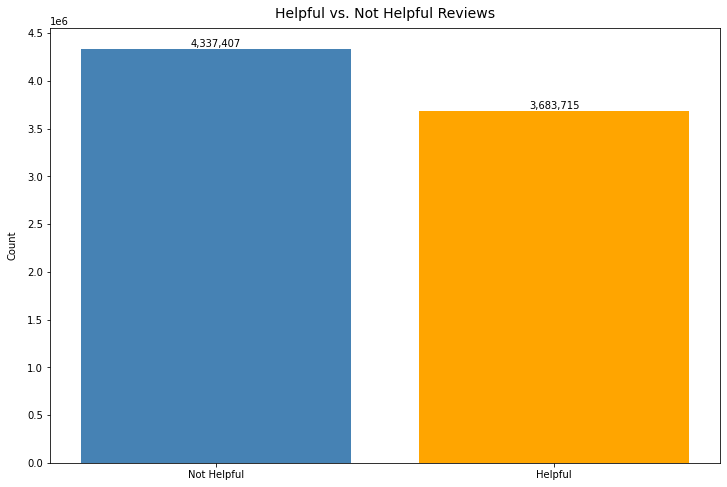

In [42]:
bar_plot('is_useful', 'Helpful vs. Not Helpful Reviews', ['Not Helpful', 'Helpful'])

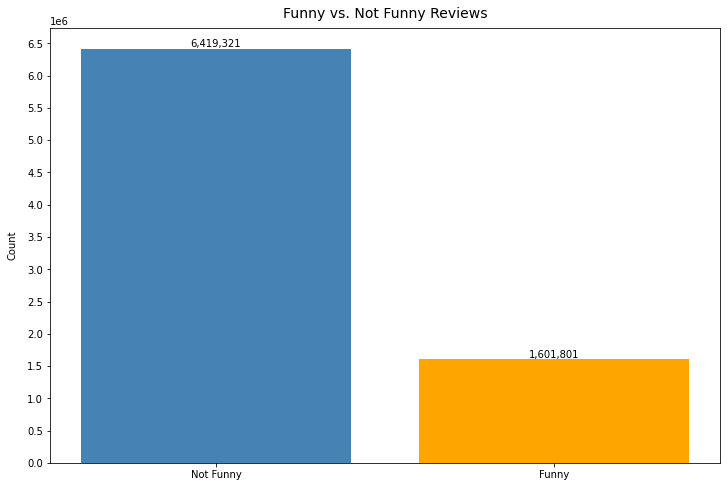

In [43]:
bar_plot('is_funny', 'Funny vs. Not Funny Reviews', ['Not Funny', 'Funny'])

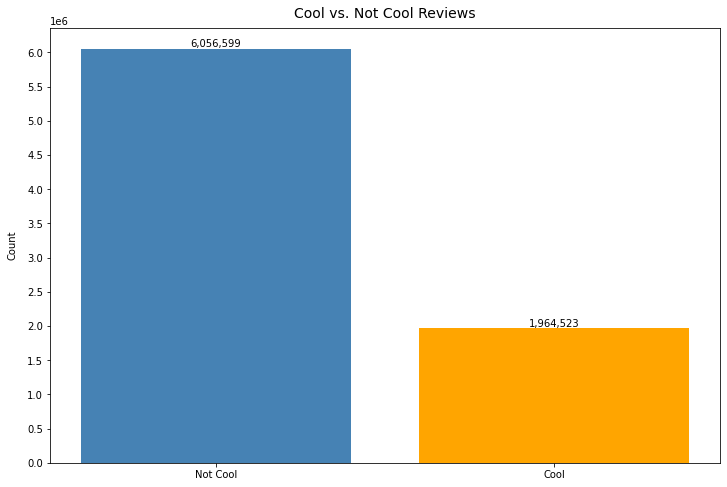

In [44]:
bar_plot('is_cool', 'Cool vs. Not Cool Reviews', ['Not Cool', 'Cool'])

In [45]:
from collections import Counter
year_counts = Counter(df_reviews.years)
years = sorted([year for year in year_counts])
year_counts = [year_counts[year] for year in years]

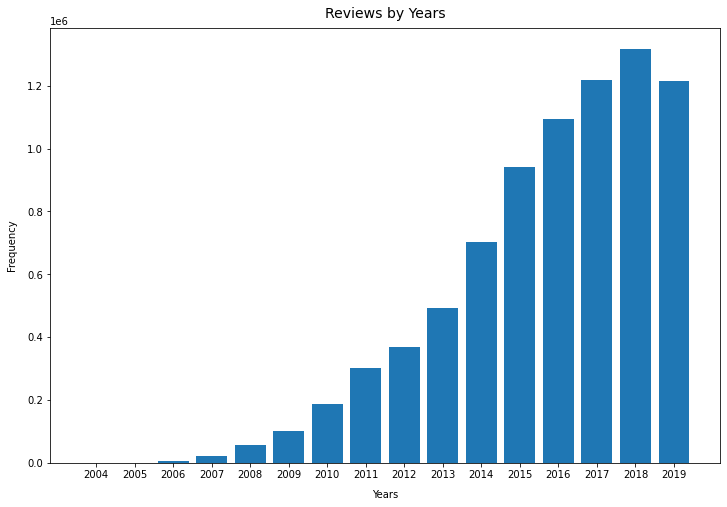

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(years, year_counts)
ax.set_xlabel('Years', labelpad=10)
ax.set_xticks(range(2004, 2020))
ax.set_xticklabels([i for i in range(2004,2020)])
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Reviews by Years', size=14, pad=10)
plt.show()

In [47]:
df_number_of_reviews = df_reviews.groupby('user_id').count().text.rename(
                          'number_of_reviews').to_frame()
df_number_of_reviews.sort_values(by='number_of_reviews', ascending=False,
                                 inplace=True)

In [48]:
print('There are {:,}'.format(df_number_of_reviews.shape[0]), end='')
print(' users with average reviews of {:.2f}'.format(
                                df_number_of_reviews.number_of_reviews.mean()))

There are 1,968,703 users with average reviews of 4.07


In [51]:
# add name and other infomation from users json file
print('Ten users with the most reviews')
df_top_10_users = df_number_of_reviews.head(10)
df_top_10_users = df_top_10_users.merge(df_users, on='user_id', how='left')
display(df_top_10_users[['name', 'yelping_since', 'elite', 'average_stars',
                         'number_of_reviews']])

Ten users with the most reviews


,name,yelping_since,elite,average_stars,number_of_reviews
0,Jennifer,2009-11-09 20:44:45,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",3.33,4331
1,Stefany,2011-06-29 14:40:01,"2012,2013,2014,2015,2016,2017,2018",3.39,2555
2,Brad,2009-11-10 00:10:36,,3.11,2039
3,Norm,2008-12-12 02:30:13,"2010,2011,2012,2013,2014,2015,2016,2017,2018",3.75,1972
4,Karen,2006-01-28 01:56:23,"2013,2014,2015,2016,2017,2018",3.88,1817
5,Michael,2008-01-31 02:55:30,"2008,2010,2011,2012,2013,2014,2015",3.90,1762
6,Bruce,2009-03-08 21:47:44,"2010,2011,2012,2013,2014,2015,2016,2017,2018",3.64,1602
7,J,2007-03-19 18:15:32,2010,3.61,1499
8,Jennifer,2010-12-27 20:51:33,"2012,2013,2014,2015,2016,2017,2018",3.61,1424
9,Chris,2009-06-16 02:39:09,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2018",3.43,1263


In [52]:
df_number_of_business = df_reviews.groupby('business_id').count().text.rename(
                          'number_of_reviews').to_frame().sort_values(
                              'number_of_reviews', ascending=False)

In [53]:
print('There are {:,} '.format(df_number_of_business.shape[0]), end='')
print('business with average reviews of {:.2f}'.format(
                            df_number_of_business.number_of_reviews.mean()))

There are 209,393 business with average reviews of 38.31


In [54]:
# add geograhical and other information from df_business_master
print('Ten businesses with the most reviews')
df_top_10_business = df_number_of_business.head(10)
df_top_10_business = df_top_10_business.merge(df_business_master,
                                              on='business_id',
                                              how='left')
display(df_top_10_business[['name', 'city', 'is_open',
                           'categories', 'number_of_reviews']])

Ten businesses with the most reviews


,name,city,is_open,categories,number_of_reviews
0,Bacchanal Buffet,Las Vegas,1,"Sandwiches, Breakfast & Brunch, Food, Restaura...",10417
1,Mon Ami Gabi,Las Vegas,1,"Restaurants, French, Steakhouses, Food, Breakf...",9536
2,Wicked Spoon,Las Vegas,1,"Buffets, Breakfast & Brunch, Restaurants",7594
3,Hash House A Go Go,Las Vegas,1,"Breakfast & Brunch, Restaurants, Food, America...",6859
4,Gordon Ramsay BurGR,Las Vegas,0,"Burgers, Restaurants, American (Traditional)",5586
5,Earl of Sandwich,Las Vegas,1,"Restaurants, Food Delivery Services, Salad, Wr...",5370
6,Yardbird Southern Table & Bar,Las Vegas,1,"Restaurants, American (New), Southern, Nightli...",4979
7,The Cosmopolitan of Las Vegas,Las Vegas,1,"Arts & Entertainment, Casinos, Hotels & Travel...",4973
8,The Buffet At Wynn,Las Vegas,1,"Food, Buffets, Event Planning & Services, Rest...",4953
9,Secret Pizza,Las Vegas,1,"Pizza, Restaurants",4882


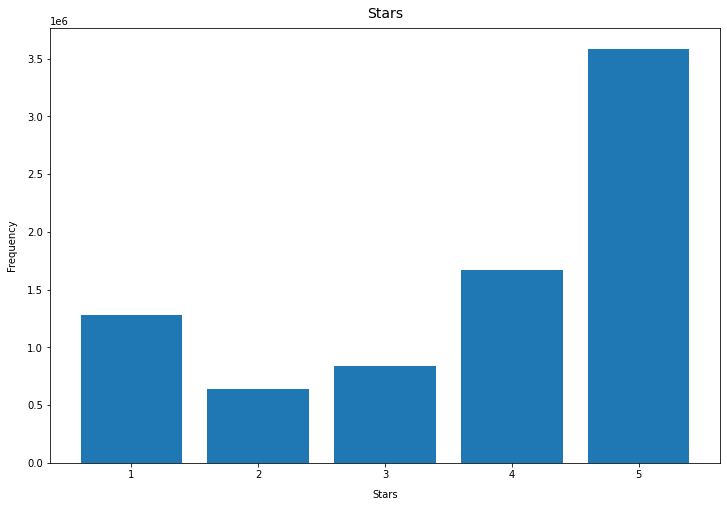

In [55]:
star_counts = Counter(df_reviews.stars)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sorted(list(star_counts.keys())), 
       [star_counts[k] for k in sorted(list(star_counts.keys()))])
ax.set_xlabel('Stars', labelpad=10)
ax.set_xticks(range(1, 6))
ax.set_xticklabels([i for i in range(1,6)])
ax.set_ylabel('Frequency', labelpad=10)
ax.set_title('Stars', size=14, pad=10)
plt.show()

In [56]:
most_useful = df_reviews.loc[df_reviews.useful == df_reviews.useful.max(),
                             'text'].values[0]
print('The most useful review is:')
print('='*79, end='\n\n')
print(most_useful)

The most useful review is:

In retrospect, I should have known better than to step foot into Amy's Baking Company (a.k.a. ABC Bistro).  

-8 pm on a Saturday night, three tables are occupied
-a sign on the door indicates they're looking for an experienced line cook, a dishwasher, waitresses, you name it
-Pita Jungle, just a stone's throw away, is packed to the gills

These are all bad signs.  They go ignored, however, because I'd eaten one thing all day, and I had drove here to try their pizza.  Never, ever again.

The waitress brings me out a water and a menu to my table for one  on the patio, which I had all to myself.  Browsing the apps, I was pleasantly surprised to see several things priced $3, which seemed like a bargain, given the high price of everything else.  $3 tapanade sounded like a good deal, but I was informed that it didn't come with anything - it was $3 extra for bread.  Since I was solo, I decided to skip it and instead pay $14 for their 12" margherita pizza.  

About

In [57]:
funniest = df_reviews.loc[df_reviews.funny == df_reviews.funny.max(),
                             'text'].values[0]
print('The funniest review is:')
print('='*79, end='\n\n')
print(funniest)

The funniest review is:

I refuse to judge a place before I try it and you should too!

Like many of you, I watched the season finale of Kitchen Nightmares.  Working in a family business myself and knowing it is never easy, I wondered if owners Amy and Samy could possibly be like they were portrayed on the show or if there was some fancy editing done on the show.  Knowing that reality TV is usually far from reality, off we went last Saturday night for dinner at Amy's Baking Company.

I called the Monday before our planned dinner and made reservations for four.  I spoke with Samy and he kindly took my reservation even though he told me we didn't need to make one.  Plans changed and by Saturday night our group had grown to seven but I was reluctant to call and advise them of the change.  I was a little nervous....would they be mad?  Would Samy yell at me?  Silly questions, I know but legitimate ones after watching the show.   He really is a nice guy and I was silly to think otherwise.  M

In [58]:
coolest = df_reviews.loc[df_reviews.cool == df_reviews.cool.max(),
                             'text'].values[0]
print('The coolest review is:')
print('='*79, end='\n\n')
print(coolest)

The coolest review is:

In retrospect, I should have known better than to step foot into Amy's Baking Company (a.k.a. ABC Bistro).  

-8 pm on a Saturday night, three tables are occupied
-a sign on the door indicates they're looking for an experienced line cook, a dishwasher, waitresses, you name it
-Pita Jungle, just a stone's throw away, is packed to the gills

These are all bad signs.  They go ignored, however, because I'd eaten one thing all day, and I had drove here to try their pizza.  Never, ever again.

The waitress brings me out a water and a menu to my table for one  on the patio, which I had all to myself.  Browsing the apps, I was pleasantly surprised to see several things priced $3, which seemed like a bargain, given the high price of everything else.  $3 tapanade sounded like a good deal, but I was informed that it didn't come with anything - it was $3 extra for bread.  Since I was solo, I decided to skip it and instead pay $14 for their 12" margherita pizza.  

About thr

# Text Normalization